<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

LEFT_PATH = 'data/bb_left_forearm_csv/'
RIGHT_PATH = 'data/bb_right_forearm_csv/'
PATH = 'data/bb_capture/'

PROCESSED_PATH = 'data/'

  0%|          | 0/3 [00:00<?, ?it/s]

bb_capture_capture_2018_03_23_12_54_35.csv
leftarm_bb_capture_capture_2018_03_23_12_54_35.csv


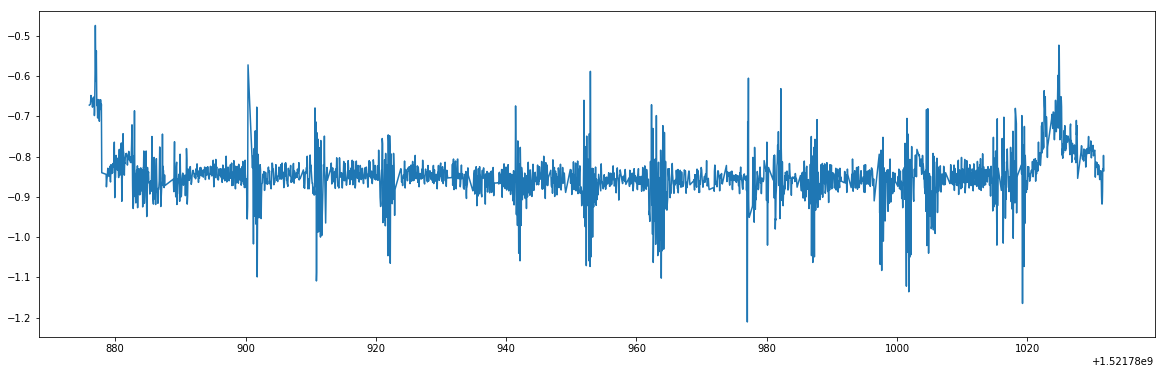

leftarm_bb_capture_capture_2018_03_23_12_58_32.csv


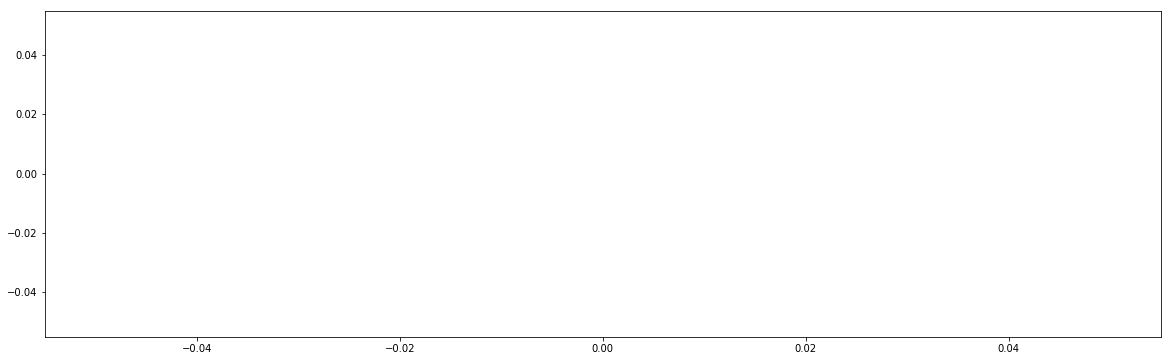

data_2018_03_23_12_45_21.csv


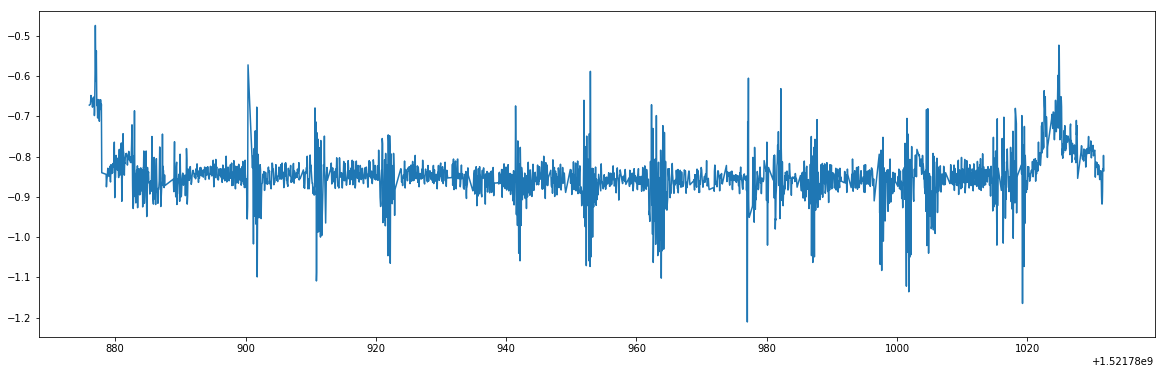

leftarm_bb_capture_capture_2018_03_23_12_51_28.csv


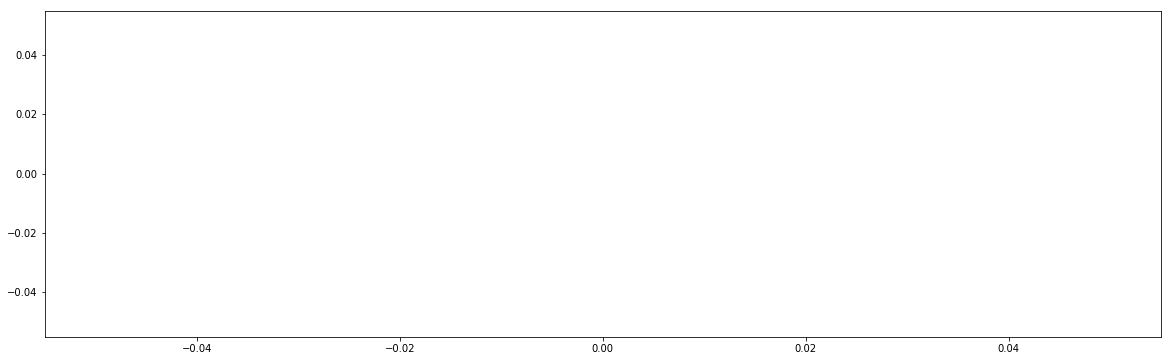

data_2018_03_23_13_09_49.csv


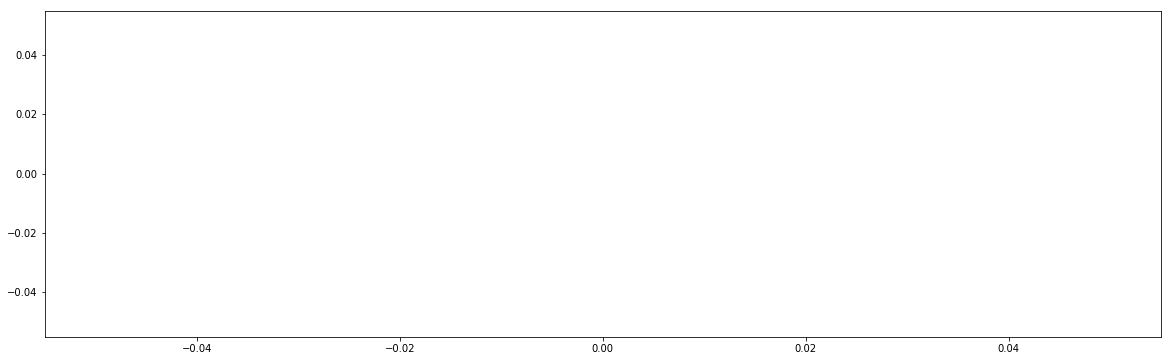

rightarm_bb_capture_capture_2018_03_23_12_54_35.csv


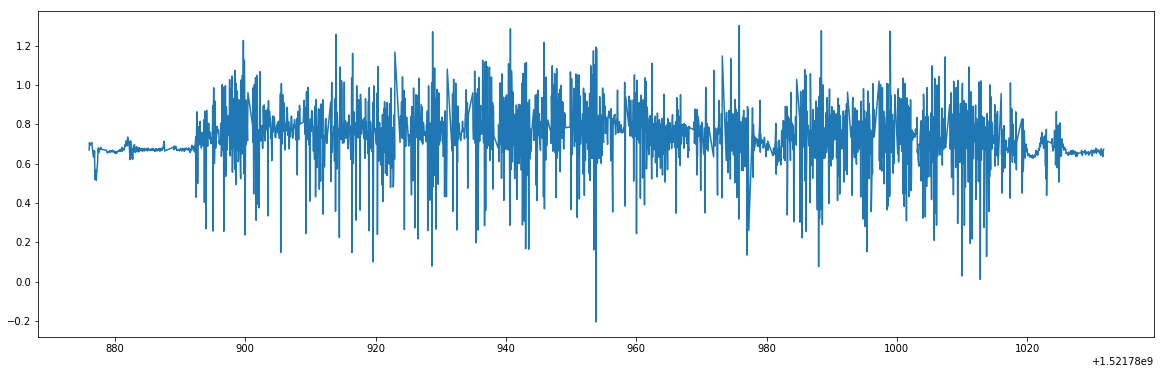

data_2018_03_23_12_47_57.csv


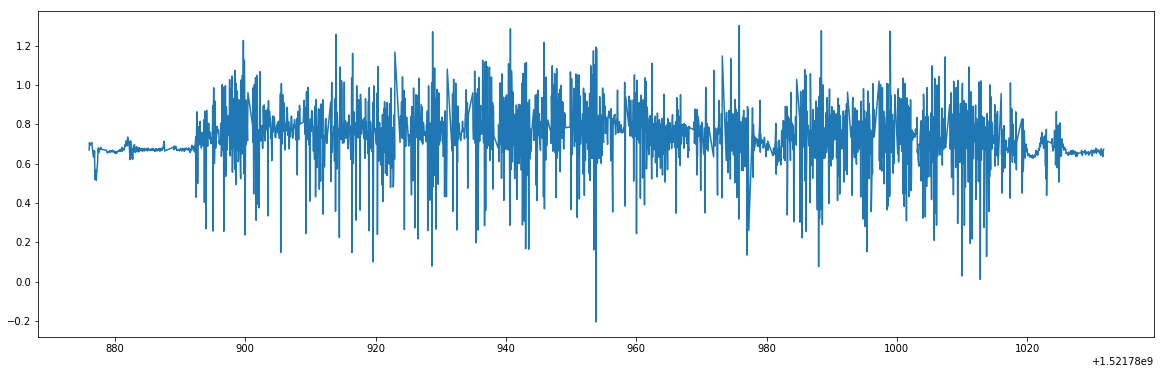

rightarm_bb_capture_capture_2018_03_23_12_51_28.csv


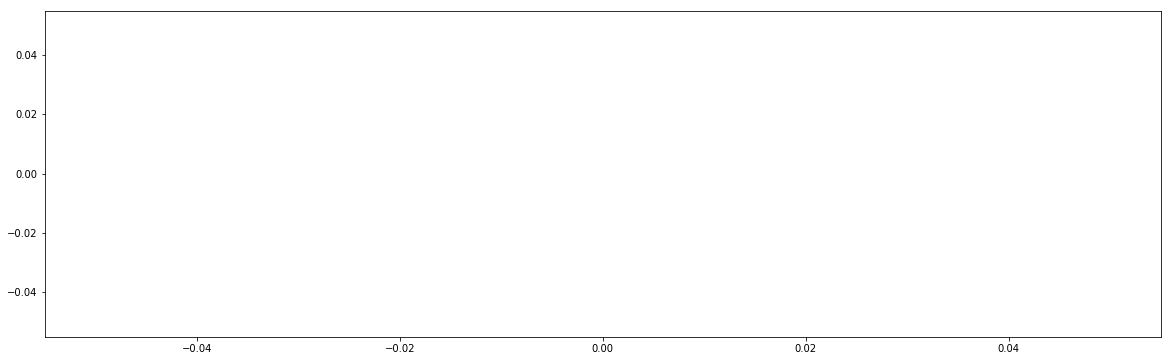

rightarm_bb_capture_capture_2018_03_23_12_58_32.csv


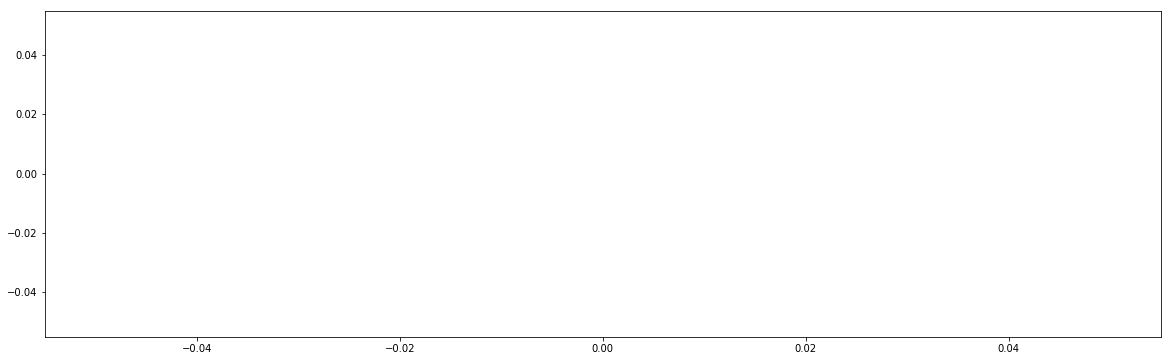

 33%|███▎      | 1/3 [00:04<00:09,  4.70s/it]

bb_capture_capture_2018_03_23_12_51_28.csv
leftarm_bb_capture_capture_2018_03_23_12_54_35.csv


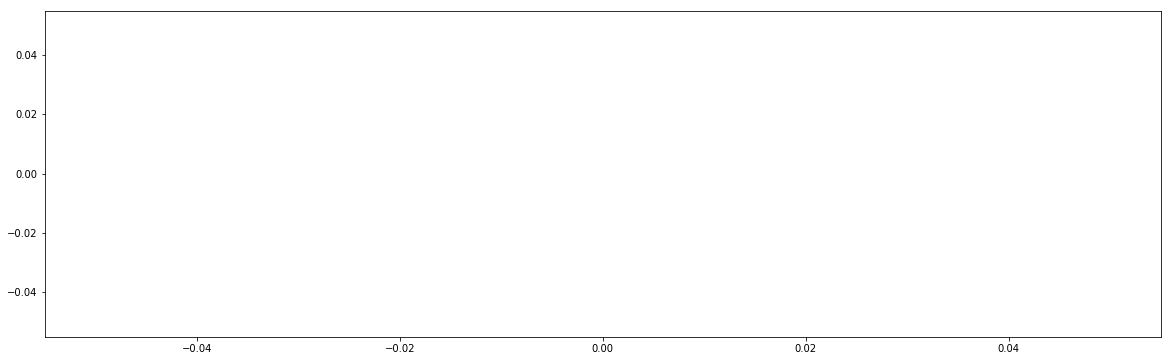

leftarm_bb_capture_capture_2018_03_23_12_58_32.csv


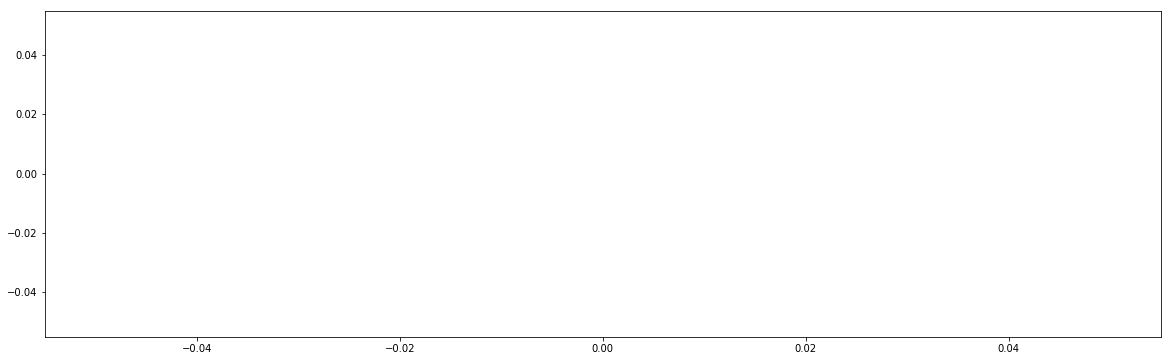

data_2018_03_23_12_45_21.csv


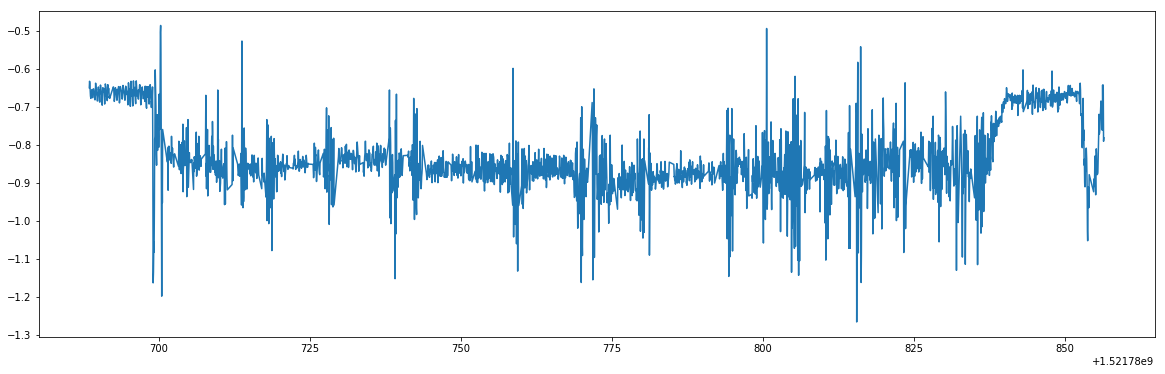

leftarm_bb_capture_capture_2018_03_23_12_51_28.csv


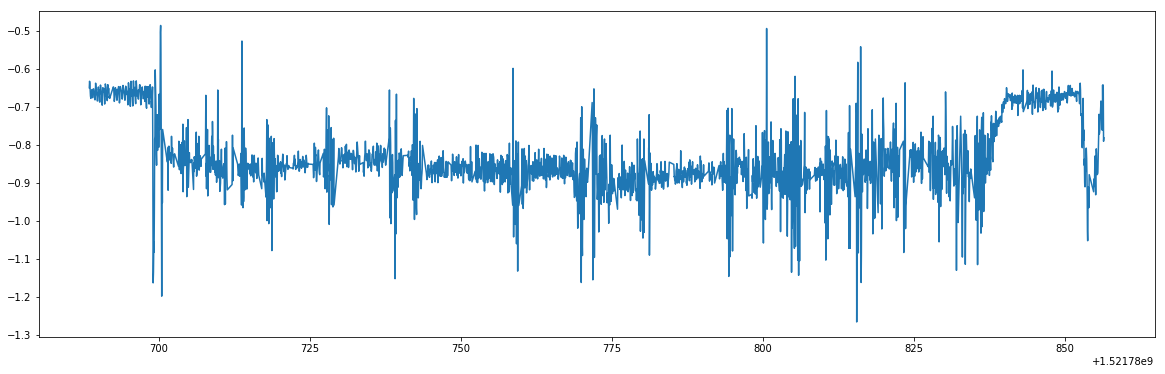

data_2018_03_23_13_09_49.csv


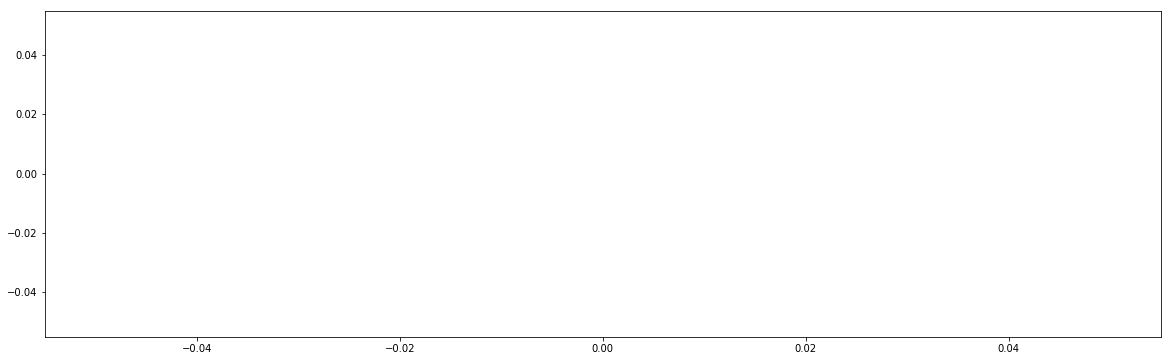

rightarm_bb_capture_capture_2018_03_23_12_54_35.csv


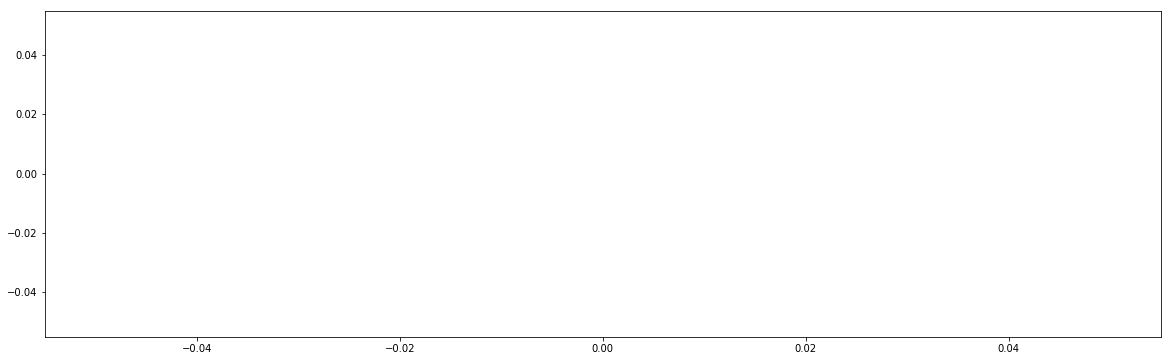

data_2018_03_23_12_47_57.csv


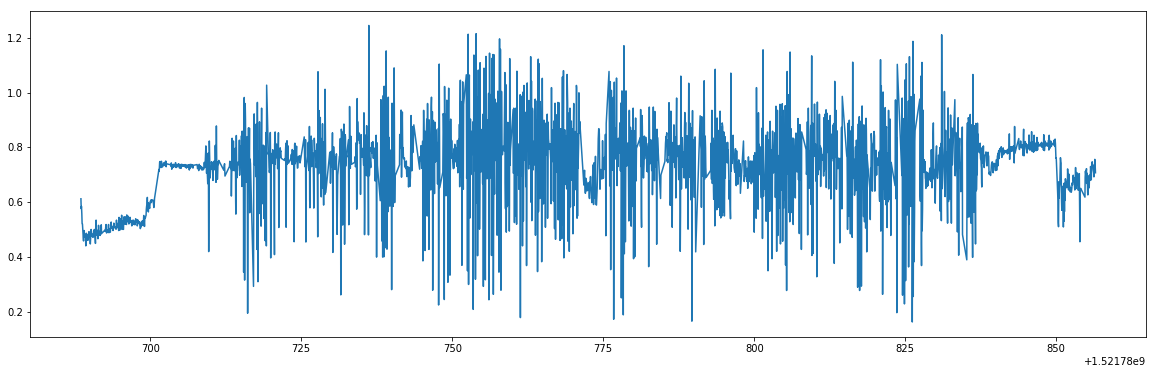

rightarm_bb_capture_capture_2018_03_23_12_51_28.csv


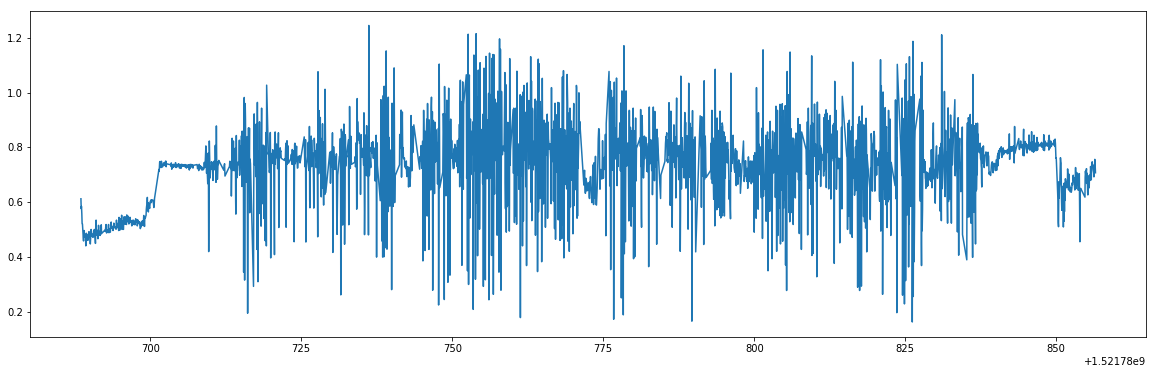

rightarm_bb_capture_capture_2018_03_23_12_58_32.csv


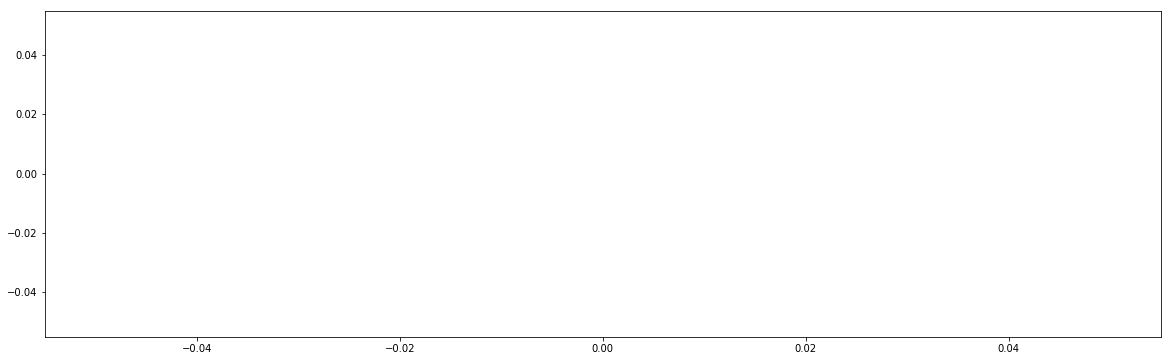

 67%|██████▋   | 2/3 [00:09<00:04,  4.75s/it]

bb_capture_capture_2018_03_23_12_58_32.csv
leftarm_bb_capture_capture_2018_03_23_12_54_35.csv


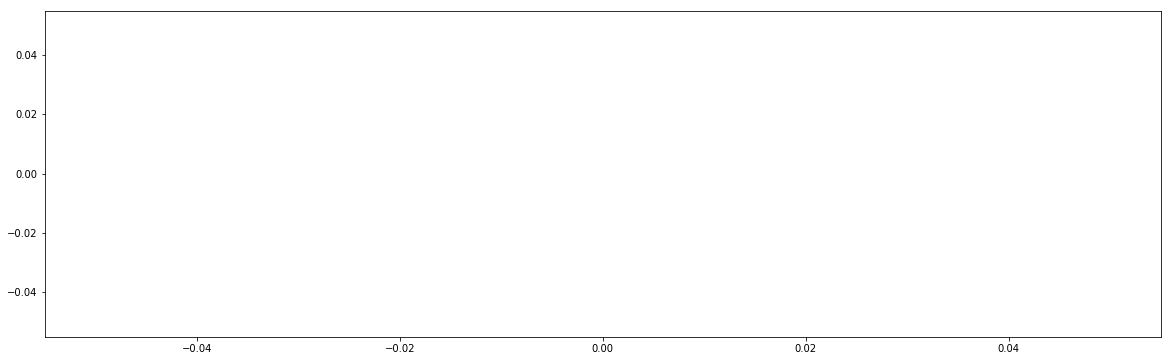

leftarm_bb_capture_capture_2018_03_23_12_58_32.csv


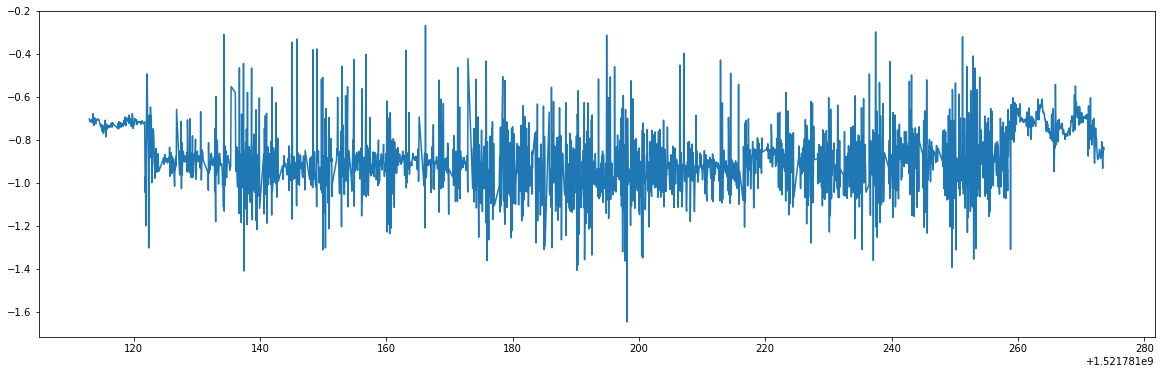

data_2018_03_23_12_45_21.csv


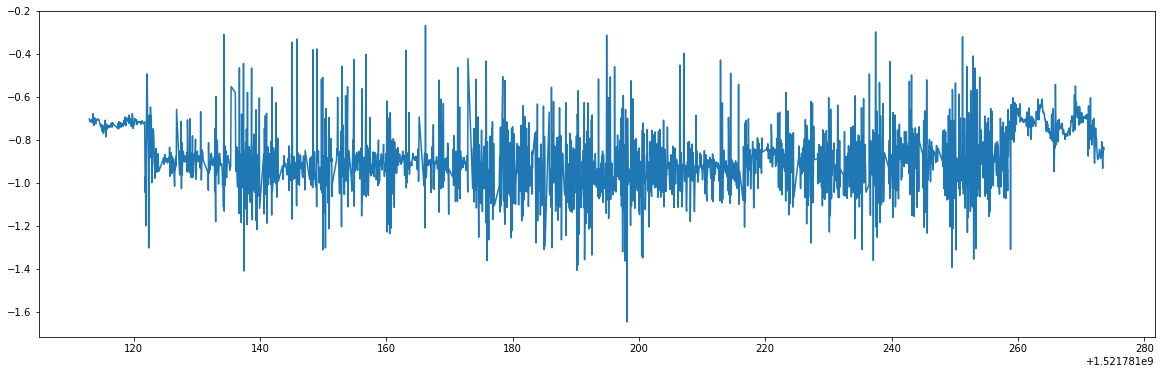

leftarm_bb_capture_capture_2018_03_23_12_51_28.csv


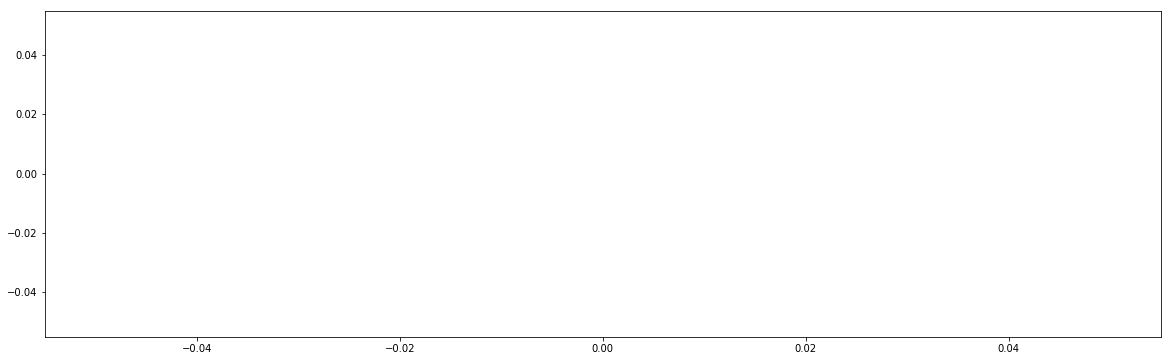

data_2018_03_23_13_09_49.csv


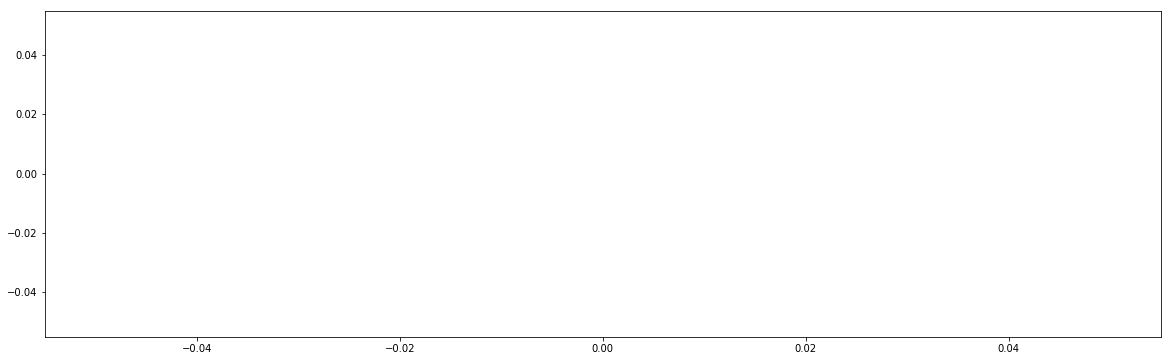

rightarm_bb_capture_capture_2018_03_23_12_54_35.csv


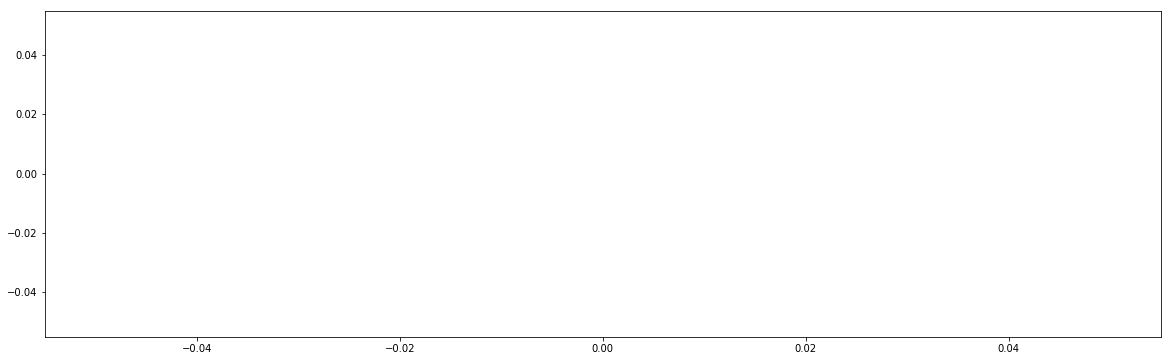

data_2018_03_23_12_47_57.csv


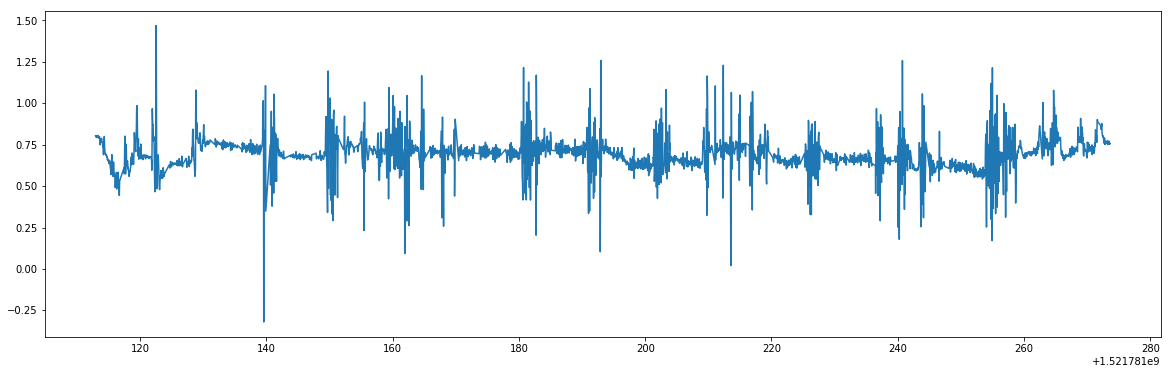

rightarm_bb_capture_capture_2018_03_23_12_51_28.csv


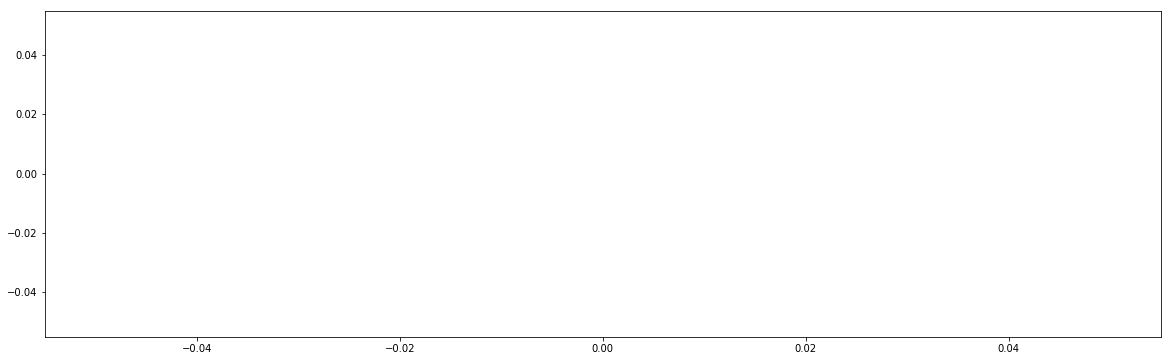

rightarm_bb_capture_capture_2018_03_23_12_58_32.csv


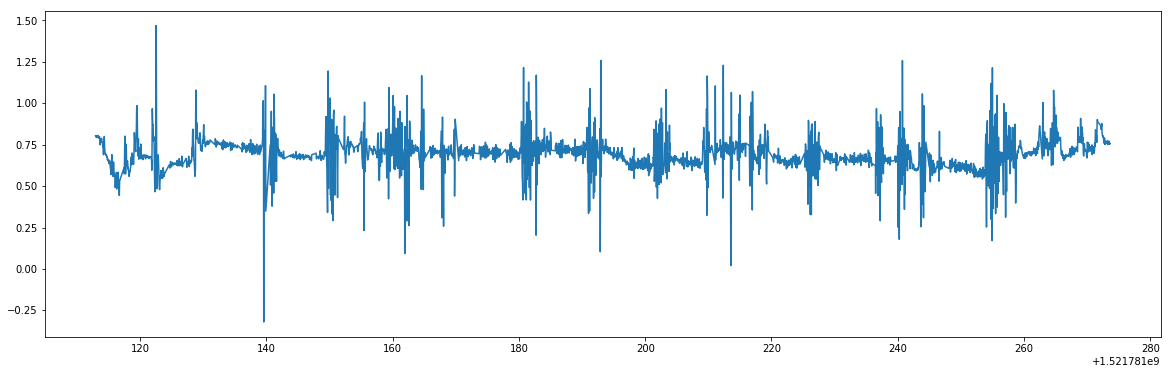

100%|██████████| 3/3 [00:14<00:00,  4.73s/it]


In [2]:
files = next(os.walk(PATH))[2]
for id_, filename in tqdm(enumerate(files), total=len(files)):
    bb_df = pd.read_csv(PATH + filename)
    lb = float(bb_df.head(1)['timestamp'])
    rb = float(bb_df.tail(1)['timestamp'])
    
    print(filename)
    
    left_files = next(os.walk(LEFT_PATH))[2]
    for filename_ in left_files:
        df = pd.read_csv(LEFT_PATH + filename_)
        df = df[(df['timestamp'] >= lb) & (df['timestamp'] <= rb)]
        print(filename_)
        
        plt.figure(figsize=(20, 6))
        plt.plot(df['timestamp'], df['imu_ax'])
        plt.show()
        
        if len(df) > 0:
            df.to_csv(LEFT_PATH + 'leftarm_' + filename, index=False)
    
    right_files = next(os.walk(RIGHT_PATH))[2]
    for filename_ in right_files:
        df = pd.read_csv(RIGHT_PATH + filename_)
        df = df[(df['timestamp'] >= lb) & (df['timestamp'] <= rb)]
        print(filename_)
        
        plt.figure(figsize=(20, 6))
        plt.plot(df['timestamp'], df['imu_ax'])
        plt.show()
        
        if len(df) > 0:
            df.to_csv(RIGHT_PATH + 'rightarm_' + filename, index=False)